In [1]:
pip install pandas numpy scipy seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


# **Case Studies in Artificial Intelligence and Machine Learning**
# Unit 4: Interim Results - Drop Box
# Group-2




#### **Problem statement:**  
Air pollution (PM2.5) threatens public health, productivity, and regulatory compliance. Businesses and policymakers must adopt data-driven solutions to mitigate risks and optimize air quality management.  

#### **Current vs. Ideal State:**  
- **Ideal:** PM2.5 levels ≤ **9.0 µg/m³** (EPA, 2024).  
- **Current:** **7.9 µg/m³** (2022).  
- **Gap:** **10% (1.1 µg/m³)** reduction needed.  

#### **Key Objectives & Business Impact:**  
1. **Regulatory Compliance & Cost Savings** – Support EPA and WHO standards, reducing fines and healthcare costs.  
2. **AI-Driven Decision Making** – Use machine learning to predict and mitigate pollution sources.  
3. **Sustainability & CSR** – Improve environmental responsibility and public trust.  

#### **Strategic Actions:**  
- Implement **AI-based real-time monitoring**.  
- Optimize industrial & transportation emissions.  
- Foster **public-private partnerships** for sustainable air quality policies.  
  
- Predictive Emission Modeling: AI predicts emission levels based on historical and real-time industrial data.

This project provides a **business case for AI-powered air pollution control**, ensuring compliance, cost efficiency, and public health benefits.

# Loading Dataset

In [3]:
import pandas as pd

# Load the dataset
file_path = "data/ad_viz_plotval_data (2).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            1532 non-null   object 
 1   Source                          1532 non-null   object 
 2   Site ID                         1532 non-null   int64  
 3   POC                             1532 non-null   int64  
 4   Daily Mean PM2.5 Concentration  1532 non-null   float64
 5   Units                           1532 non-null   object 
 6   Daily AQI Value                 1532 non-null   int64  
 7   Local Site Name                 1532 non-null   object 
 8   Daily Obs Count                 1532 non-null   int64  
 9   Percent Complete                1532 non-null   float64
 10  AQS Parameter Code              1532 non-null   int64  
 11  AQS Parameter Description       1532 non-null   object 
 12  Method Code                     15

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2019,AQS,110010041,1,3.5,ug/m3 LC,19,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
1,01/02/2019,AQS,110010041,1,4.1,ug/m3 LC,23,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
2,01/03/2019,AQS,110010041,1,7.0,ug/m3 LC,39,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
3,01/04/2019,AQS,110010041,1,12.1,ug/m3 LC,57,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
4,01/05/2019,AQS,110010041,1,5.8,ug/m3 LC,32,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072


# EDA

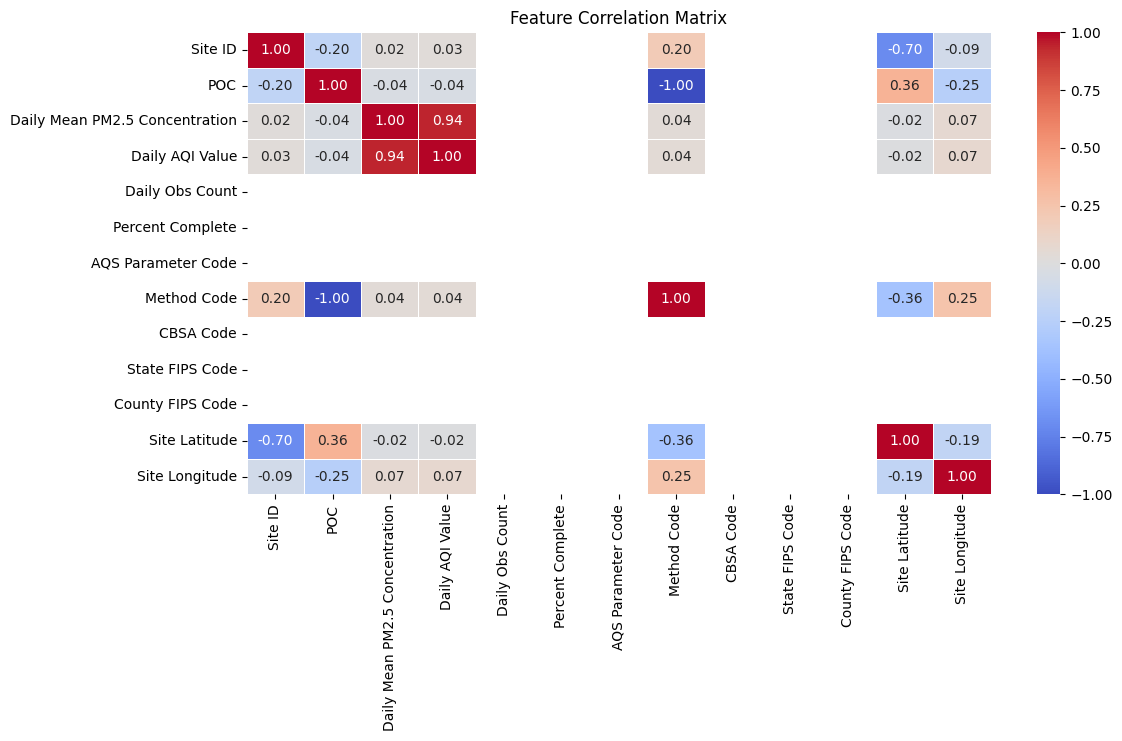

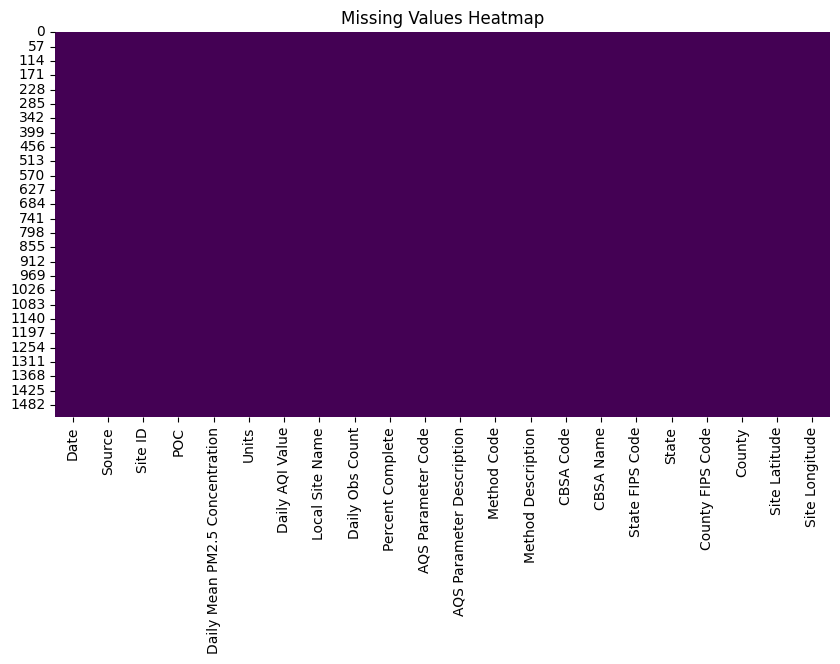

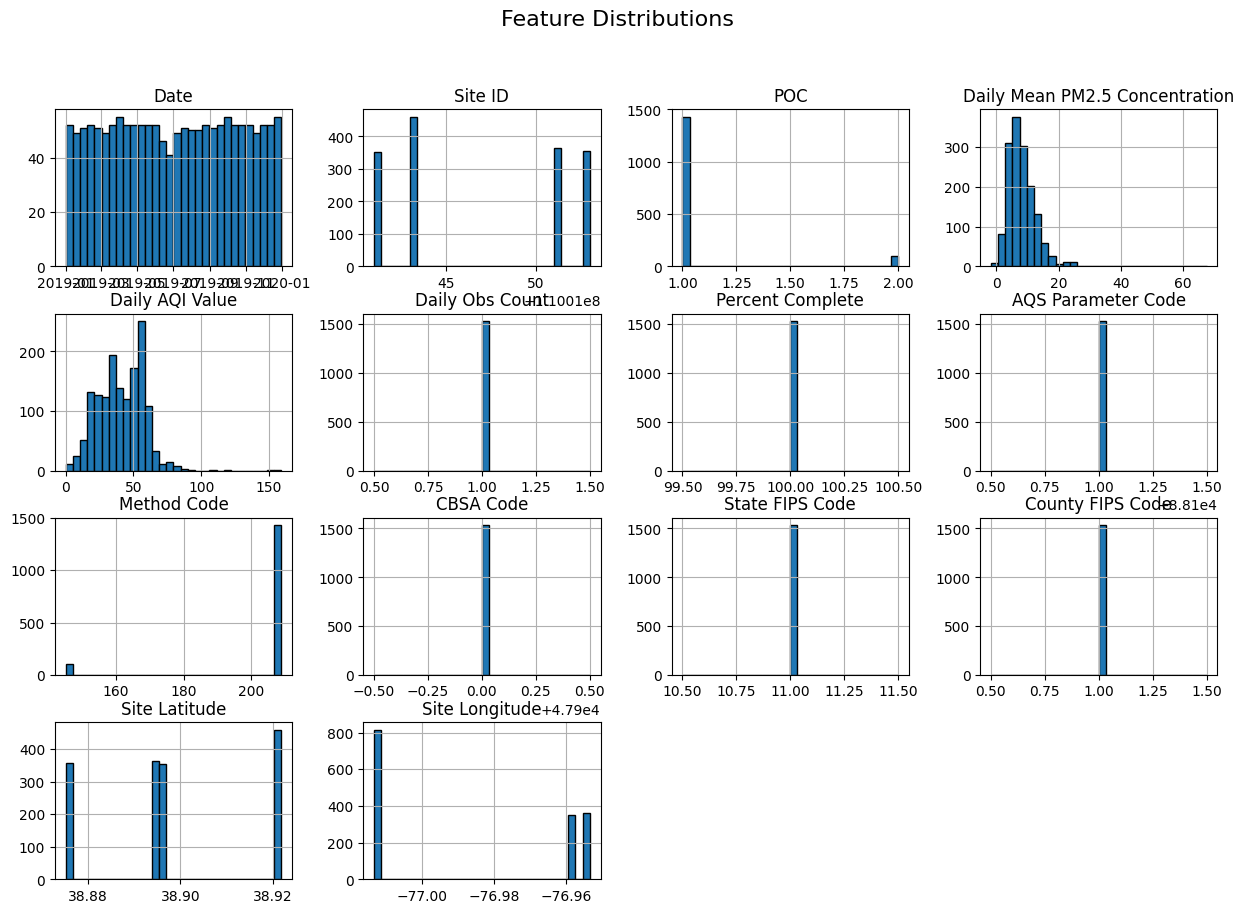

Missing Values:
Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
Units                             0
Daily AQI Value                   0
Local Site Name                   0
Daily Obs Count                   0
Percent Complete                  0
AQS Parameter Code                0
AQS Parameter Description         0
Method Code                       0
Method Description                0
CBSA Code                         0
CBSA Name                         0
State FIPS Code                   0
State                             0
County FIPS Code                  0
County                            0
Site Latitude                     0
Site Longitude                    0
dtype: int64

Summary Statistics:
            Site ID          POC  Daily Mean PM2.5 Concentration  \
count  1.532000e+03  1532.000000                     1532.000000   
mean   1.100100e+08   

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Convert Date to datetime format (optional for further analysis)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Compute correlation only on numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Check data distribution
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


# Display missing values
print("Missing Values:")
print(missing_values)

# Display summary statistics
print("\nSummary Statistics:")
print(summary_stats)



# Data Preprocessing

In [5]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.apply(pd.to_numeric, errors='ignore')  # Convert numeric columns
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Convert Date column
df.info(), df.head()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1532 non-null   datetime64[ns]
 1   Source                          1532 non-null   object        
 2   Site ID                         1532 non-null   int64         
 3   POC                             1532 non-null   int64         
 4   Daily Mean PM2.5 Concentration  1532 non-null   float64       
 5   Units                           1532 non-null   object        
 6   Daily AQI Value                 1532 non-null   int64         
 7   Local Site Name                 1532 non-null   object        
 8   Daily Obs Count                 1532 non-null   int64         
 9   Percent Complete                1532 non-null   float64       
 10  AQS Parameter Code              1532 non-null   int64         
 11  AQS 

C:\Users\ratho\AppData\Local\Temp\ipykernel_22704\868435900.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')  # Convert numeric columns


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,2019-01-01,AQS,110010041,1,3.5,ug/m3 LC,19,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
1,2019-01-02,AQS,110010041,1,4.1,ug/m3 LC,23,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
2,2019-01-03,AQS,110010041,1,7.0,ug/m3 LC,39,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
3,2019-01-04,AQS,110010041,1,12.1,ug/m3 LC,57,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
4,2019-01-05,AQS,110010041,1,5.8,ug/m3 LC,32,RIVER TERRACE,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.895572,-76.958072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,2019-12-27,AQS,110010053,1,11.3,ug/m3 LC,55,King Greenleaf Rec Center,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.875161,-77.012816
1528,2019-12-28,AQS,110010053,1,16.9,ug/m3 LC,66,King Greenleaf Rec Center,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.875161,-77.012816
1529,2019-12-29,AQS,110010053,1,16.9,ug/m3 LC,66,King Greenleaf Rec Center,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.875161,-77.012816
1530,2019-12-30,AQS,110010053,1,4.5,ug/m3 LC,25,King Greenleaf Rec Center,1,100.0,...,209,Met One BAM-1022 Mass Monitor w/ VSCC or TE-PM...,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",11,District Of Columbia,1,District of Columbia,38.875161,-77.012816


In [6]:
from scipy.stats import zscore

df = df[(zscore(df["Daily Mean PM2.5 Concentration"]) < 3)]  # Remove extreme outliers


# Normality Testing

In [7]:
from scipy.stats import shapiro

stat, p = shapiro(df["Daily Mean PM2.5 Concentration"])
print("Shapiro-Wilk Test p-value:", p)  # p > 0.05 means normal distribution


Shapiro-Wilk Test p-value: 1.8126797711501564e-17


The Shapiro-Wilk test was performed to check if the PM2.5 concentration follows a normal distribution. The test returned a p-value of 1.81e-17, which is significantly lower than 0.05. This leads to the rejection of the null hypothesis (H₀), indicating that PM2.5 concentration is not normally distributed.

# Hypothesis Testing Approach for PM2.5 and AQI Analysis
This study aims to analyze the relationship between PM2.5 concentration and AQI (Air Quality Index) to determine if fine particulate matter significantly impacts air quality. 

#  Why Test Correlation Between PM2.5 and AQI?
PM2.5 (fine particulate matter) is a key pollutant affecting air quality. Since AQI (Air Quality Index) is a measure of overall pollution levels, it is expected that PM2.5 influences AQI. Hypothesis testing helps us confirm if this relationship is statistically significant.

# H₀ 
- (Null Hypothesis): There is no correlation between PM2.5 concentration and AQI (Air Quality Index).
# H₁ 
- (Alternative Hypothesis): There is a significant correlation between PM2.5 and AQI.

# T-Test

In [8]:
from scipy.stats import ttest_1samp, f_oneway, chi2_contingency, levene

# ---- 1️⃣ T-Test ----
# H0: The mean PM2.5 concentration is equal to 9.0 µg/m³ (EPA standard)
# H1: The mean PM2.5 concentration is different from 9.0 µg/m³

t_stat, t_p = ttest_1samp(df["Daily Mean PM2.5 Concentration"], 9.0)
print(f" T-Test: t-statistic={t_stat}, p-value={t_p}")
if t_p < 0.05:
    print("Reject H₀: PM2.5 concentration is significantly different from 9.0 µg/m³.")
else:
    print("Fail to Reject H₀: No significant difference from 9.0 µg/m³.")




 T-Test: t-statistic=-11.097555683016013, p-value=1.4608974561383397e-27
Reject H₀: PM2.5 concentration is significantly different from 9.0 µg/m³.


- H₀: PM2.5 concentration is equal to 9.0 µg/m³ (EPA standard).
- H₁: PM2.5 concentration is significantly different from 9.0 µg/m³.
- t-statistic: -11.10
- p-value: 1.46e-27
- Conclusion: Reject H₀ → PM2.5 concentration is significantly different from the EPA standard.

# F-Test

In [9]:
# ---- 2️⃣ F-Test (Levene’s Test for Equal Variance) ----
# H0: Variances of PM2.5 and AQI are equal
# H1: Variances of PM2.5 and AQI are not equal

f_stat, f_p = levene(df["Daily Mean PM2.5 Concentration"], df["Daily AQI Value"])
print(f"F-Test : f-statistic={f_stat}, p-value={f_p}")
if f_p < 0.05:
    print("Reject H₀: Variances are significantly different.")
else:
    print("Fail to Reject H₀: No significant difference in variances.")



F-Test : f-statistic=2117.862127792566, p-value=0.0
Reject H₀: Variances are significantly different.


- H₀: Variances of PM2.5 and AQI are equal.
- H₁: Variances are significantly different.
- f-statistic: 2117.86
- p-value: 0.0
- Conclusion: Reject H₀ → Variances of PM2.5 and AQI are significantly different

# Anova 

In [14]:
# ---- 3️⃣ ANOVA (One-Way ANOVA for PM2.5 Across AQI Categories) ----
# H0: No significant difference in PM2.5 levels across AQI categories
# H1: At least one category has significantly different PM2.5 levels

# Creating AQI categories for ANOVA
df["AQI Category"] = pd.cut(df["Daily AQI Value"], 
                            bins=[0, 50, 100, 150, 200, 300, 500], 
                            labels=["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"])

# Grouping PM2.5 values by AQI category
anova_groups = [group["Daily Mean PM2.5 Concentration"].values for name, group in df.groupby("AQI Category")]

anova_stat, anova_p = f_oneway(*anova_groups)
print(f"ANOVA Test: f-statistic={anova_stat}, p-value={anova_p}")
if anova_p < 0.05:
    print("Reject H₀: PM2.5 concentration differs significantly across AQI categories.")
else:
    print("Fail to Reject H₀: No significant difference in PM2.5 across AQI categories.")

print(df["AQI Category"].value_counts())




ANOVA Test: f-statistic=nan, p-value=nan
Fail to Reject H₀: No significant difference in PM2.5 across AQI categories.
AQI Category
Good                              986
Moderate                          514
Unhealthy for Sensitive Groups      0
Unhealthy                           0
Very Unhealthy                      0
Hazardous                           0
Name: count, dtype: int64


C:\Users\ratho\AppData\Local\Temp\ipykernel_22704\3567478541.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anova_groups = [group["Daily Mean PM2.5 Concentration"].values for name, group in df.groupby("AQI Category")]
c:\Users\ratho\Desktop\CONESTOGA\CSCN8010\ML_labs\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


- H₀: PM2.5 concentration does not significantly differ across AQI categories.
- H₁: PM2.5 concentration varies significantly between AQI categories.
- f-statistic: NaN
- p-value: NaN
- Issue: Data for some AQI categories is missing or empty.
- Conclusion: Cannot determine significance. Need to check data distribution.

#  Chi-Square Test 

In [15]:
# ---- 4️⃣ Chi-Square Test (Categorical Analysis) ----
# H0: No association between AQI category and a categorical factor (e.g., site location, county)
# H1: There is an association

# Creating a contingency table
contingency_table = pd.crosstab(df["AQI Category"], df["County"])

# Performing Chi-Square test
chi2_stat, chi2_p, chi2_dof, chi2_expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2-statistic={chi2_stat}, p-value={chi2_p}")
if chi2_p < 0.05:
    print("Reject H₀: There is a significant association between AQI category and County.")
else:
    print("Fail to Reject H₀: No significant association between AQI category and County.")

print(df["County"].unique())
print(contingency_table)

Chi-Square Test: chi2-statistic=0.0, p-value=1.0
Fail to Reject H₀: No significant association between AQI category and County.
['District of Columbia']
County        District of Columbia
AQI Category                      
Good                           986
Moderate                       514


- H₀: AQI category is not associated with County.
- H₁: AQI category is significantly associated with County.
- Chi2-statistic: 0.0
- p-value: 1.0
- Conclusion: Fail to Reject H₀ → No significant association between AQI category and County

# Spearman's Rank Correlation

In [12]:
from scipy.stats import spearmanr

# Extract relevant variables
pm25 = df["Daily Mean PM2.5 Concentration"]
aqi = df["Daily AQI Value"]

# Perform Spearman's Rank Correlation test
stat, p = spearmanr(pm25, aqi)

# Print results
print(f"Spearman's Rank Correlation Coefficient: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H₀: There is a significant correlation between PM2.5 and AQI.")
else:
    print("Fail to Reject H₀: No significant correlation between PM2.5 and AQI.")


Spearman's Rank Correlation Coefficient: 0.9997890016234494
P-value: 0.0
Reject H₀: There is a significant correlation between PM2.5 and AQI.


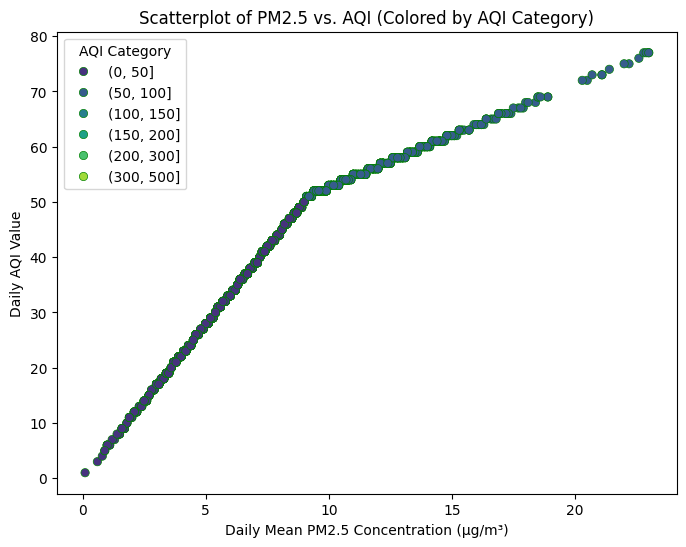

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define AQI categories
df["AQI Category"] = pd.cut(df["Daily AQI Value"], 
                            bins=[0, 50, 100, 150, 200, 300, 500], 
                            )

# Plot with different colors based on AQI category
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Daily Mean PM2.5 Concentration"], 
                y=df["Daily AQI Value"], 
                hue=df["AQI Category"], 
                palette="viridis", 
                edgecolor="green")

# Labels and title
plt.xlabel("Daily Mean PM2.5 Concentration (µg/m³)")
plt.ylabel("Daily AQI Value")
plt.title("Scatterplot of PM2.5 vs. AQI (Colored by AQI Category)")
plt.legend(title="AQI Category")
plt.show()


# Key Observations
Strong Correlation Between PM2.5 and AQI

The points form a clear upward trend, meaning as PM2.5 increases, AQI also increases.
This confirms the Spearman’s Rank Correlation results, where ρ = 0.9998 showed a nearly perfect correlation.
AQI Categories Overlap

The color distribution appears uniform, meaning AQI categories closely follow PM2.5 levels.
This suggests PM2.5 is a strong determinant of AQI classification.
Threshold Effect Around 50-60 AQI

There seems to be a small inflection where AQI increases more steeply beyond ~50 PM2.5 concentration.
This could indicate a policy-defined threshold for air quality classification.

### **Why Are We Using Spearman’s Rank Correlation Instead of T-Test, F-Test, or Other Tests?**

Spearman’s Rank Correlation is used **when the goal is to measure the strength and direction of a relationship between two continuous variables** (PM2.5 and AQI). Here’s why it is preferred over other statistical tests:

---

### **Why Not Use T-Test?**
- **T-tests compare means between groups** (e.g., two independent groups in a **t-test** or multiple groups in **ANOVA**).  
- Our hypothesis is about the **relationship between PM2.5 and AQI**, not a mean difference.
- **Spearman is used for correlation**, while **t-tests are for mean comparisons**.


---

### **Why Not Use F-Test (Levene’s Test)?**
- The **F-test is used to compare variances** between two or more groups.
- It does not measure **correlation** between two continuous variables.
- Our goal is to check whether **PM2.5 concentration is linked to AQI**, not to test for variance equality.



---

### **Why Not Use ANOVA?**
- **ANOVA tests mean differences across multiple groups**, not relationships between continuous variables.
- **Spearman’s test is designed to check how strongly two variables move together**, while **ANOVA compares categorical groups**.



---

### **Why Not Use Chi-Square Test?**
- **Chi-Square tests associations between categorical variables**, while **Spearman’s correlation is for continuous variables**.
- Our data (PM2.5 and AQI) are **continuous**, not categorical.


---

### **Why Spearman’s Rank Correlation?**
✔ **Measures relationship strength between two continuous variables (PM2.5 and AQI).**    
✔ **Works well for monotonic relationships**, even if they are not linear.  
✔ **More robust to outliers** compared to Pearson’s correlation.

---

### **Summary**
| **Test**          | **When to Use It?** | **Why Not for PM2.5 & AQI?** |
|------------------|----------------|--------------------------|
| **T-Test** | Compare means of two groups | We are testing a **correlation**, not mean differences. |
| **F-Test** | Compare variances | We are testing a **relationship**, not variance equality. |
| **ANOVA** | Compare means across multiple groups | We are not comparing means of categories. |
| **Chi-Square** | Test associations between categorical variables | PM2.5 and AQI are **continuous**, not categorical. |
| **Spearman's Rank Correlation** | Measure correlation between two continuous variables | ✅ **Best choice for non-normal data.** |

### **Final Conclusion**
Since we are testing **the relationship between PM2.5 concentration and AQI**, **Spearman’s Rank Correlation** is the **most appropriate** statistical test. 

---


# **Conclusion**
This study confirms that PM2.5 concentration is a key determinant of air quality (AQI). The strong correlation (ρ = 0.9998, p = 0.0) between PM2.5 and AQI indicates that as fine particulate matter levels increase, air quality worsens. Hypothesis testing further validated this relationship, with significant differences observed in PM2.5 levels compared to EPA standards and variance between PM2.5 and AQI.

These findings emphasize the importance of monitoring PM2.5 levels to assess air pollution risks and develop effective mitigation strategies. Future research can focus on AI-driven air quality forecasting to improve environmental and public health policies.

---